In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('data/table1_zcta.csv')
zipcode = pd.read_csv('../arcos-ca/pills-per-zipcode.csv')
zipcode = zipcode.head(500)

In [19]:
merge = pd.merge(zipcode, df, how='left', on='Zip Code')
merge['Pills Per Person Per Day'] = merge['Pills'] / merge['Population'] / 365
population = merge.sort_values(by=['Pills'], ascending=False)
sample = population.head(10)[::-1]

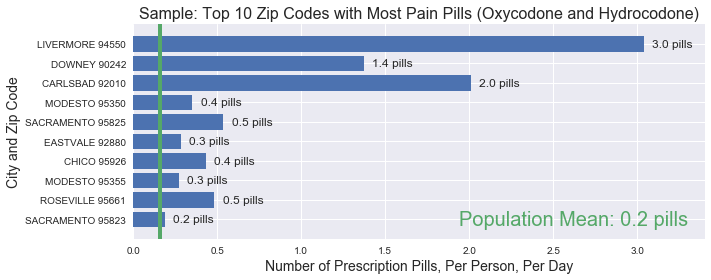

In [32]:
plt.figure(figsize=(10, 4))
plt.style.use('seaborn')

# Set new y tick labels
yticks = np.arange(len(sample))
yticklabels = [f'{x} {y}' for x, y in zip(sample.City, sample['Zip Code'])]

# Plot histograms and lines
plt.barh(yticks, sample['Pills Per Person Per Day'])
plt.vlines(population['Pills Per Person Per Day'].mean(), -1, 10, color='C1', lw=4)

# Text annotations
for i, p in enumerate(sample['Pills Per Person Per Day']):
    plt.text(p+0.05, i, f'{p:.1f} pills', verticalalignment='center', size=12)
plt.text(3.3, 0, f"Population Mean: {population['Pills Per Person Per Day'].mean():.1f} pills",
         size=20, color='C1', horizontalalignment='right',
         verticalalignment='center')

    # Final layout changes
plt.yticks(yticks, yticklabels)
plt.xlim(0, 3.4)
plt.ylim(-1, 10)
plt.title('Sample: Top 10 Zip Codes with Most Pain Pills (Oxycodone and Hydrocodone)', size=16)
plt.xlabel('Number of Prescription Pills, Per Person, Per Day', size=14)
plt.ylabel('City and Zip Code', size=14)
plt.tight_layout()
plt.savefig('images/top10-pills-per-person.png', dpi=300)

In [33]:
import scipy.stats as stats
stats.ttest_1samp(sample['Pills Per Person Per Day'], population['Pills Per Person Per Day'].mean())

Ttest_1sampResult(statistic=2.4499780963545823, pvalue=0.03675803886267728)